<a href="https://colab.research.google.com/github/aescobar71/Proyecto-Final-Data-Science/blob/main/Entrega_10_%22Desafio_AlgoritmoML_MVP_Andr%C3%A9sFelipe_EscobarM%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: Andrés Felipe Escobar Mosquera**

**Comisión 49175**

**Data Science**


# **Décima Entrega: Entrenando un algoritmo de Machine Learning**

# **1. Presentación del Proyecto**

**Abstracto**

Poder establecer el precio de venta de un vehículo para ser competitivo va a depender de las características propias del mismo, pero también de las opciones que ofrece el mercado automotriz.

Australia presenta un mercado próspero y competitivo en dicha materia, con una gran selección de automóviles para satisfacer diversas demandas y gustos. Es así como, algunas marcas se han destacado repetidamente por presentar los vehículos más vendidos del pais. El rendimiento, la confiabilidad y las características del vehículo en general son algunos de los elementos que han contribuido al éxito de estas ventas.

El modelo de auto más vendido en Australia en 2023 fue el Toyota Hilux, con 32.763 vehículos vendidos, seguido por la Ford Ranger en segunda posición con 31.884 vehículos vendidos. El MG ZS de MG (marca China) consiguió la tercera posición, vendiendo 17.431 vehículos, lo que supone un impresionante aumento interanual de 1.68 veces, superando al eterno éxito de ventas, el Toyota RAV4.**

El conjunto de datos elegido contiene la información más reciente sobre los precios de vehículos en Australia para el año 2023. También se incluyen diversos aspectos importantes para el mercado automotriz, que se describen más adelante, y que proporcionan información útil sobre las tendencias y los factores que influyen en los precios de los vehículos.

El presente proyecto busca definir un modelo que permita estimar el precio de venta de un vehículo con base a las características que más influyen en ello.





** Tomado de: https://www.autouserguide.com/es/Blogs/Revisi%C3%B3n-de-expertos-de-los-diez-autos-m%C3%A1s-vendidos-en-Australia-en-2023/

Los siguientes son detalles de las columnas mas importantes del set de datos:  

- Brand (Marca): es el nombre del fabricante del vehículo.

- Year (Año): se refiere al año de fabricación o lanzamiento.

- Model (Modelo): Nombre o código del modelo del vehiculo.

- UsedOrNew (Usado/Nuevo): se refiere a la condición del vehiculo (usado o nuevo).

- Transmission (Transmisión): define el tipo de transmisión (manual, o automática).

- Engine (Motor): Refiere la capacidad del motor (en litros o KW).

- DriveType (Tipo de Tracción): Define el tipo de tracción del vehículo.

- FuelType (Tipo de combustible): indica el combustible que usa el vehículo (gasolina, diesel, hibrido o eléctrico)

- FuelConsumtion (Consumo de combustible): establece el consumo de combustible en litros / 100 Km.

- Kilometres (Kilometraje): Se refiere a la distancia recorrida por el veículo.

- Location (Ubicación): Ubicación del vehículo (ciudad y estado).

- CylindersinEngine (Cilindros del Motor): indica la cantidad de cilindros que presenta el motor del vehículo.

- BodyType (Tipo de Cuerpo o forma): Se refiere a la forma del vehículo.

- Doors (Puertas): Indica el número de puertas del vehículo.

- Seats (Asientos): Indica el número de asientos del vehículo.

- Price (Precio): Precio del auto (dado en dolares australianos).

**Objetivo**

Definir un modelo que permita estimar el precio de venta de un vehículo con base a las variables que presenta. Para ello, utilizaremos algoritmos de aprendizaje supervisado, más precisamente, algoritmos de regresión, ya que permiten predecir valores continuos (el Precio del vehículo, en este caso).

# **2. Lectura de datos y chequeo inicial**

**Importación de librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

**Configuración del entorno de Python en Google Colab**

In [ ]:
from google.colab import drive
import os
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Lectura del dataset**

Vamos a tomar el dataset trabajado en la segunda entrega del proyecto final, el cual se puede desacargar ya limpio después del análisis multivariado.

In [ ]:
%cd '/content/gdrive/MyDrive/Data Science/Proyecto Final/Colab Notebooks/Bases de Datos'
df= pd.read_excel('Vehículos_Australia_clean1_df.xlsx')

/content/gdrive/MyDrive/Data Science/Proyecto Final/Colab Notebooks/Bases de Datos


**Análisis inicial del dataset**

In [ ]:
df.head()

,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExt/Int,Location,BodyType,Doors,Seats,Price,Brand,Engine,FuelConsumtion,State
0,2022,Rexton,2,0,AWD,Diesel,5595,White / Black,"Caringbah, NSW",SUV,4,7,51990,Marca de Corea del Sur,Motor Estandar,Consumo Medio,NSW
1,2022,MG3,0,0,Front,Premium,16,Black / Black,"Brookvale, NSW",Hatchback,5,5,19990,Marca China,Motor Estandar,Consumo Medio,NSW
2,2022,430I,0,0,Rear,Premium,8472,Grey / White,"Sylvania, NSW",Coupe,2,4,108988,Marca Alemana,Motor Estandar,Consumo Medio,NSW
3,2011,E500,0,0,Rear,Premium,136517,White / Brown,"Mount Druitt, NSW",Coupe,2,4,32990,Marca Alemana,Motor Grande,Consumo Alto,NSW
4,2022,Arkana,0,0,Front,Unleaded,1035,Grey / Black,"Castle Hill, NSW",SUV,4,5,34990,Marca Francesa,Motor Estandar,Consumo Medio,NSW


In [ ]:
df.tail()

,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExt/Int,Location,BodyType,Doors,Seats,Price,Brand,Engine,FuelConsumtion,State
16577,2014,Alphard,0,0,Front,Unleaded,66000,Grey / -,"Rocklea, QLD",Commercial,4,7,29500,Marca Japonesa,Motor Estandar,Consumo Medio,QLD
16578,2012,S-Class,0,0,Rear,Diesel,117432,Silver / -,"Port Melbourne, VIC",Desconocido,4,5,39888,Marca Alemana,Motor Estandar,Consumo Medio,VIC
16579,2022,Vitara,2,0,Front,Unleaded,5165,Yellow / -,"Dinmore, QLD",SUV,4,5,35280,Marca Japonesa,Motor Estandar,Consumo Medio,QLD
16580,2016,GLC250,0,0,AWD,Premium,85525,Grey / Black,"Albion, QLD",SUV,4,5,41888,Marca Alemana,Motor Estandar,Consumo Medio,QLD
16581,2021,C200,0,0,Rear,Unleaded,31852,Gold / -,"Yatala, QLD",Sedan,4,5,65888,Marca Alemana,Motor Estandar,Consumo Medio,QLD


In [ ]:
df.shape

(16582, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16582 entries, 0 to 16581
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            16582 non-null  int64 
 1   Model           16582 non-null  object
 2   UsedOrNew       16582 non-null  int64 
 3   Transmission    16582 non-null  int64 
 4   DriveType       16582 non-null  object
 5   FuelType        16582 non-null  object
 6   Kilometres      16582 non-null  int64 
 7   ColourExt/Int   16582 non-null  object
 8   Location        16582 non-null  object
 9   BodyType        16582 non-null  object
 10  Doors           16582 non-null  int64 
 11  Seats           16582 non-null  int64 
 12  Price           16582 non-null  int64 
 13  Brand           16582 non-null  object
 14  Engine          16582 non-null  object
 15  FuelConsumtion  16582 non-null  object
 16  State           16582 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.2+ MB


In [ ]:
df.isna().sum().sort_values()

Year              0
Engine            0
Brand             0
Price             0
Seats             0
Doors             0
BodyType          0
FuelConsumtion    0
Location          0
Kilometres        0
FuelType          0
DriveType         0
Transmission      0
UsedOrNew         0
Model             0
ColourExt/Int     0
State             0
dtype: int64

# **3. Feature Engineering**

Analicemos el comportamiento del Precio por año, teniendo en cuenta si el vehículo es nuevo o usado (usado (0), nuevo (1) o demo (2)).

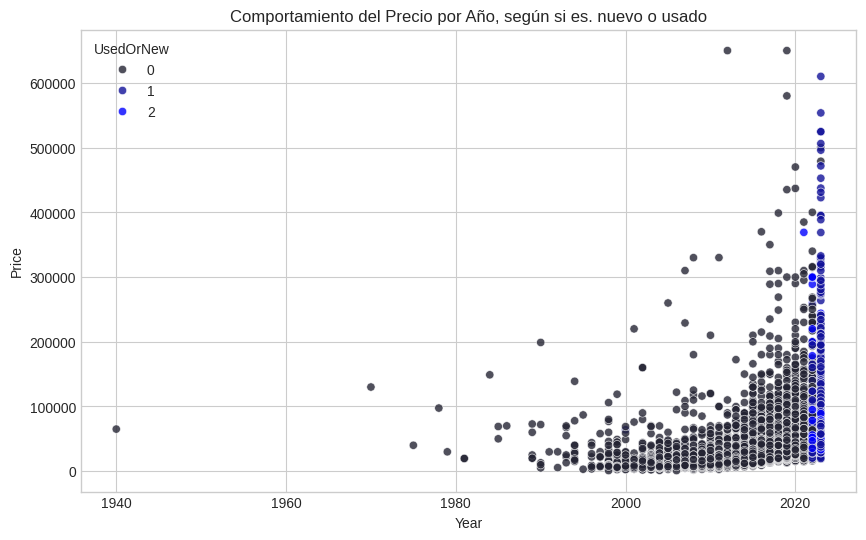

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Price', hue= 'UsedOrNew', alpha=0.8, palette='dark:blue')
plt.title('Comportamiento del Precio por Año, según si es. nuevo o usado')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Podemos observar que en general el comportamiento del Precio se incrementa para años más recientes. Antes del 2020, se aprecian solo vehículos usados, donde tres de estos muestran precios bastante elevados por encima de 500.000 AUD, lo cual indica que son vehículos de lujo (marcas italianas o inglesas, motores grandes, vehículos compactos, etc.) Podriamos considerar como outliers estos datos y eliminarlos. A partir del año 2020, se comienzan a observar vehículos nuevos y demo, también con un comportamiento de precio creciente conforme se incrementa el año. El vehículo del año 1940, cuyo precio está al rededor de 70.000 AUD, también podría considerarse un outlier, ya que está muy alejado del resto de datos. Incluso se podrían tomar los datos a partir de 1985.

In [ ]:
drop = df.loc [df.Year  < 1985 ].index
df.drop (drop, inplace = True)

In [ ]:
drop = df.loc[df.Price > 500000].index
df.drop(drop, inplace = True)

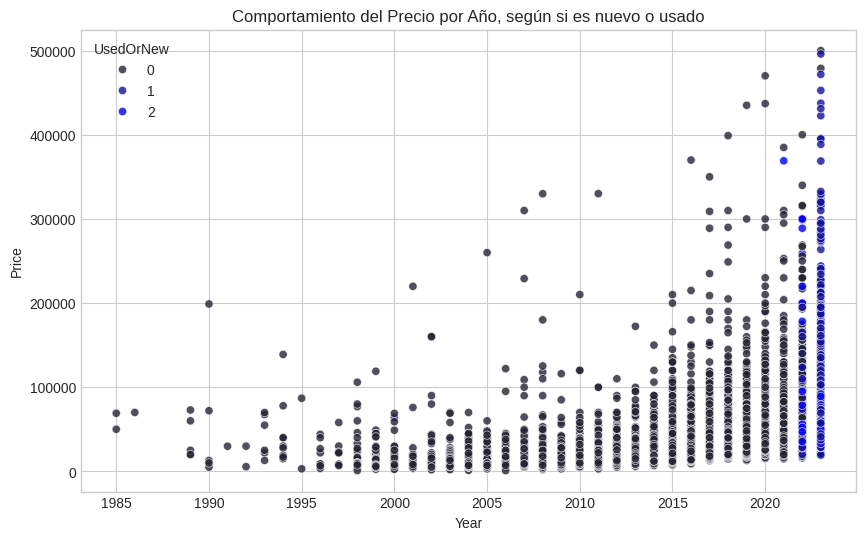

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Price', hue= 'UsedOrNew', alpha=0.8, palette='dark:blue')
plt.title('Comportamiento del Precio por Año, según si es nuevo o usado')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [ ]:
df.describe(include='all')

,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExt/Int,Location,BodyType,Doors,Seats,Price,Brand,Engine,FuelConsumtion,State
count,16566.00000,16566,16566.000000,16566.000000,16566,16566,16566.000000,16566,16566,16566,16566.000000,16566.000000,16566.000000,16566,16566,16566,16566
unique,NaN,767,NaN,NaN,5,8,NaN,819,618,11,NaN,NaN,NaN,14,4,4,9
top,NaN,Hilux,NaN,NaN,Front,Unleaded,NaN,White / -,"Minchinbury, NSW",SUV,NaN,NaN,NaN,Marca Japonesa,Motor Estandar,Consumo Medio,NSW
freq,NaN,430,NaN,NaN,6945,7510,NaN,2816,544,6877,NaN,NaN,NaN,7633,13530,13680,6343
mean,2016.22854,NaN,0.128577,0.117349,NaN,NaN,100070.834239,NaN,NaN,NaN,4.005010,5.094591,36850.967584,NaN,NaN,NaN,NaN
std,5.12260,NaN,0.413194,0.321845,NaN,NaN,76911.762104,NaN,NaN,NaN,0.658666,1.073647,33276.761290,NaN,NaN,NaN,NaN
min,1985.00000,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,2.000000,2.000000,880.000000,NaN,NaN,NaN,NaN
25%,2013.00000,NaN,0.000000,0.000000,NaN,NaN,43482.750000,NaN,NaN,NaN,4.000000,5.000000,18991.000000,NaN,NaN,NaN,NaN
50%,2017.00000,NaN,0.000000,0.000000,NaN,NaN,86331.000000,NaN,NaN,NaN,4.000000,5.000000,29065.000000,NaN,NaN,NaN,NaN
75%,2020.00000,NaN,0.000000,0.000000,NaN,NaN,144199.000000,NaN,NaN,NaN,4.000000,5.000000,43987.750000,NaN,NaN,NaN,NaN


Ahora, vamos a realizar un procesamiento para variables tipo Object y otro diferente para las variables tipo numérico:

In [ ]:
df.dtypes

Year               int64
Model             object
UsedOrNew          int64
Transmission       int64
DriveType         object
FuelType          object
Kilometres         int64
ColourExt/Int     object
Location          object
BodyType          object
Doors              int64
Seats              int64
Price              int64
Brand             object
Engine            object
FuelConsumtion    object
State             object
dtype: object

Para este procesamiento, vamos a eliminar las columnas 'Model', 'ColourExt/Int' y 'Location', ya que no proporcionan información relevante para este análisis.

In [ ]:
df.drop(columns=['Model', 'ColourExt/Int', 'Location'], inplace=True)
df.head()

,Year,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,BodyType,Doors,Seats,Price,Brand,Engine,FuelConsumtion,State
0,2022,2,0,AWD,Diesel,5595,SUV,4,7,51990,Marca de Corea del Sur,Motor Estandar,Consumo Medio,NSW
1,2022,0,0,Front,Premium,16,Hatchback,5,5,19990,Marca China,Motor Estandar,Consumo Medio,NSW
2,2022,0,0,Rear,Premium,8472,Coupe,2,4,108988,Marca Alemana,Motor Estandar,Consumo Medio,NSW
3,2011,0,0,Rear,Premium,136517,Coupe,2,4,32990,Marca Alemana,Motor Grande,Consumo Alto,NSW
4,2022,0,0,Front,Unleaded,1035,SUV,4,5,34990,Marca Francesa,Motor Estandar,Consumo Medio,NSW


Filtramos las variables categóricas y aparte las numéricas, sin incluir la variable objetivo:

In [ ]:
var_categoricas = df.select_dtypes(include=['object']).columns
print(var_categoricas)

Index(['DriveType', 'FuelType', 'BodyType', 'Brand', 'Engine',
       'FuelConsumtion', 'State'],
      dtype='object')


In [ ]:
var_numericas = df.drop(columns=['Price']).select_dtypes(exclude=['object']).columns
print(var_numericas)

Index(['Year', 'UsedOrNew', 'Transmission', 'Kilometres', 'Doors', 'Seats'], dtype='object')


Vamos a verificar en cada columna tipo Object del Dataframe para revisar los valores únicos de cada una:

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
 print(f"{col}: {df[col].unique()}")

DriveType: ['AWD' 'Front' 'Rear' 'Other' '4WD']
FuelType: ['Diesel' 'Premium' 'Unleaded' 'Hybrid' 'Other' 'Electric' 'LPG' 'Leaded']
BodyType: ['SUV' 'Hatchback' 'Coupe' 'Commercial' 'Desconocido' 'Wagon' 'Ute / Tray'
 'Sedan' 'People Mover' 'Convertible' 'Other']
Brand: ['Marca de Corea del Sur' 'Marca China' 'Marca Alemana' 'Marca Francesa'
 'Marca Japonesa' 'Marca Inglesa' 'Marca USA' 'Marca Sueca'
 'Marca Italiana' 'Marca Australiana' 'Marca de Rep. Checa' 'Marca India'
 'Marca Española' 'Marca de Malasia']
Engine: ['Motor Estandar' 'Motor Grande' 'Motor Pequeño' 'Motor Muy Grande']
FuelConsumtion: ['Consumo Medio' 'Consumo Alto' 'Consumo Bajo' 'Consumo Muy Alto']
State: ['NSW' 'VIC' 'QLD' 'SA' 'WA' 'ACT' 'TAS' 'NT' 'Unknown']


# **4. Encoding**

Vamos a utilizar un pipeline para encodear las variables categóricas y para reescalar las variables numéricas:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
X = df.drop(columns="Price")
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [ ]:
df.head()

,Year,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,BodyType,Doors,Seats,Price,Brand,Engine,FuelConsumtion,State
0,2022,2,0,AWD,Diesel,5595,SUV,4,7,51990,Marca de Corea del Sur,Motor Estandar,Consumo Medio,NSW
1,2022,0,0,Front,Premium,16,Hatchback,5,5,19990,Marca China,Motor Estandar,Consumo Medio,NSW
2,2022,0,0,Rear,Premium,8472,Coupe,2,4,108988,Marca Alemana,Motor Estandar,Consumo Medio,NSW
3,2011,0,0,Rear,Premium,136517,Coupe,2,4,32990,Marca Alemana,Motor Grande,Consumo Alto,NSW
4,2022,0,0,Front,Unleaded,1035,SUV,4,5,34990,Marca Francesa,Motor Estandar,Consumo Medio,NSW


Creamos el primer pipeline con el transformador para cada tipo de variable:

In [ ]:
columns_tranformer = ColumnTransformer([
                                        ('categorical', OneHotEncoder(), var_categoricas),  # Codificar variables categóricas
                                        ('numeric', StandardScaler(), var_numericas)  # Escalar variables numéricas
                                    ])

Unificar el transformador anterior con el pipeline donde el segundo transformador será Random Forest Regressor:

In [ ]:
pipeline = Pipeline([
    ('preprocessor',columns_tranformer) ,
    ('regressor', RandomForestRegressor())
])

In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  Index(['DriveType', 'FuelType', 'BodyType', 'Brand', 'Engine',
       'FuelConsumtion', 'State'],
      dtype='object')),
                                                 ('numeric', StandardScaler(),
                                                  Index(['Year', 'UsedOrNew', 'Transmission', 'Kilometres', 'Doors', 'Seats'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

# **5. Entrenamiento de un modelo de Machine Learning**

**Random Forest Regressor**

Ahora entrenamos el Pipeline

In [ ]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [ ]:
import math
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 6962.962435034518
Mean Squared Error (MSE): 258230378.31959423
Root Mean Squared Error (RMSE): 16069.548167873116
R2 score: 0.791931145509473


DF Real vs Predicción

In [ ]:
df_RF = pd.DataFrame({'Price': y_test, 'Price_Pred': y_pred})
df_RF

,Price,Price_Pred
13347,39990,31974.00
11569,86733,62577.91
7803,53888,42566.69
12245,43990,36431.40
15091,36990,27894.98
...,...,...
6649,47970,37134.52
7271,46888,42155.38
4429,29900,28882.83
983,39888,44201.27


Las predicciones de este modelo se desvían aproximadamente 6986 AUD del valor real. Aproximadamente el 79% de la variabilidad en los datos reales es explicada por este modelo. No está mal, pero evaluaremos otros modelos.

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop(columns="Price")
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

Unificar el transformador anterior con el pipeline donde el segundo transformador será Linear Regression:

In [ ]:
pipeline2 = Pipeline([
    ('preprocessor',columns_tranformer) ,
    ('regressor', LinearRegression())
])

In [ ]:
pipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  Index(['DriveType', 'FuelType', 'BodyType', 'Brand', 'Engine',
       'FuelConsumtion', 'State'],
      dtype='object')),
                                                 ('numeric', StandardScaler(),
                                                  Index(['Year', 'UsedOrNew', 'Transmission', 'Kilometres', 'Doors', 'Seats'], dtype='object'))])),
                ('regressor', LinearRegression())])

Ahora entrenamos el Pipeline

In [ ]:
pipeline2.fit(X_train, y_train)

y_pred = pipeline2.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 12137.124852627601
Mean Squared Error (MSE): 568151770.7410561
Root Mean Squared Error (RMSE): 23835.934442372007
R2 score: 0.5422123110219443


DF Real vs Predicción

In [ ]:
df_LR = pd.DataFrame({'Price': y_test, 'Price_Pred': y_pred})
df_LR

,Price,Price_Pred
13347,39990,40978.874061
11569,86733,62069.694794
7803,53888,44008.175635
12245,43990,36854.845975
15091,36990,26022.092155
...,...,...
6649,47970,40083.517809
7271,46888,32161.870154
4429,29900,28995.407243
983,39888,48495.290486


Las predicciones de este modelo se desvían aproximadamente 12137 AUD del valor real. Aproximadamente el 54% de la variabilidad en los datos reales es explicada por este modelo. Es decir que la regresión lineal no es capaz de mejorar lo predicho por el modelo anterior.

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.drop(columns="Price")
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

Unificar el transformador anterior con el pipeline donde el segundo transformador será Linear Regression:

In [ ]:
pipeline3 = Pipeline([
    ('preprocessor',columns_tranformer) ,
    ('regressor', LogisticRegression())
])

In [ ]:
pipeline3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  Index(['DriveType', 'FuelType', 'BodyType', 'Brand', 'Engine',
       'FuelConsumtion', 'State'],
      dtype='object')),
                                                 ('numeric', StandardScaler(),
                                                  Index(['Year', 'UsedOrNew', 'Transmission', 'Kilometres', 'Doors', 'Seats'], dtype='object'))])),
                ('regressor', LogisticRegression())])

Ahora entrenamos el Pipeline

In [ ]:
pipeline3.fit(X_train, y_train)

y_pred = pipeline3.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 10637.112506035732
Mean Squared Error (MSE): 580141677.3684211
Root Mean Squared Error (RMSE): 24086.13039424185
R2 score: 0.5325514564252142


DF Real vs Predicción

In [ ]:
df_LOR = pd.DataFrame({'Price': y_test, 'Price_Pred': y_pred})
df_LOR

,Price,Price_Pred
13347,39990,27999
11569,86733,51990
7803,53888,41990
12245,43990,29990
15091,36990,27995
...,...,...
6649,47970,43990
7271,46888,26990
4429,29900,26990
983,39888,19990


Los valores del R2 y del MAE indican que no es adecuado para la predicción de los datos. Este modelo tampoco arroja un mejor resultado frente al modelo de Random forest.

**Support Vecor Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
X = df.drop(columns="Price")
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

Unificar el transformador anterior con el pipeline donde el segundo transformador será Linear Regression:

In [ ]:
pipeline4 = Pipeline([
    ('preprocessor',columns_tranformer) ,
    ('regressor', SVC(kernel='linear'))
])

In [ ]:
pipeline4

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  Index(['DriveType', 'FuelType', 'BodyType', 'Brand', 'Engine',
       'FuelConsumtion', 'State'],
      dtype='object')),
                                                 ('numeric', StandardScaler(),
                                                  Index(['Year', 'UsedOrNew', 'Transmission', 'Kilometres', 'Doors', 'Seats'], dtype='object'))])),
                ('regressor', SVC(kernel='linear'))])

Ahora entrenamos el Pipeline

In [ ]:
pipeline4.fit(X_train, y_train)

y_pred = pipeline4.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 8715.771366489618
Mean Squared Error (MSE): 460100952.68107194
Root Mean Squared Error (RMSE): 21449.963931929393
R2 score: 0.6292741435096805


DF Real vs Predicción

In [ ]:
df_SVM = pd.DataFrame({'Price': y_test, 'Price_Pred': y_pred})
df_SVM

,Price,Price_Pred
13347,39990,27999
11569,86733,58231
7803,53888,41990
12245,43990,29990
15091,36990,27995
...,...,...
6649,47970,41990
7271,46888,29990
4429,29900,26990
983,39888,24990


Este modelo muestra un mejor resultado que los modelos de regresión anteriormente establecidos, pero aún asi, no supera los resultados del modelo de Random forest.